Loading and Reading CSV files

In [19]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

Merge DataFrames

In [20]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019,34.58,3908450000000,46,Urban


Deliverable 1: Get a Summary DataFrame

In [21]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [22]:
# 2. Get the total drivers for each city type
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [23]:
#  3. Get the total amount of fares for each city type
fares=pyber_data_df.groupby(["type"]).sum()["fare"]
fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [24]:
#  4. Get the average fare per ride for each city type.
average_fare_per_ride= fares.divide(ride_count)
average_fare_per_ride.head()
average_fare_per_ride.describe()

count     3.000000
mean     30.039780
std       5.112718
min      24.525772
25%      27.747950
50%      30.970128
75%      32.796784
max      34.623440
dtype: float64

In [25]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver=fares/total_driver_count
average_fare_per_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [32]:
#6. Create a PyBer summary DataFrame
pyber_summary_df = pd.DataFrame({"Total Rides": ride_count, "Total Drivers": total_driver_count, "Total Fares": fares, "Average Fare per Ride": average_fare_per_ride, "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [33]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name =None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [34]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


Multiple-line chart of total fares for each city type

In [44]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019,34.58,3908450000000,46,Urban


In [51]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_per_date = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
sum_fares_per_date

type   date     
Rural  1/1/2019      43.69
       1/11/2019     16.42
       1/14/2019     72.15
       1/15/2019     30.26
       1/18/2019     58.69
                     ...  
Urban  5/4/2019     323.57
       5/5/2019     322.10
       5/6/2019     181.20
       5/7/2019     258.01
       5/8/2019     170.82
Name: fare, Length: 334, dtype: float64

In [54]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fares_per_date_df=sum_fares_per_date.reset_index()
sum_fares_per_date_df

,index,type,date,fare
0,0,Rural,1/1/2019,43.69
1,1,Rural,1/11/2019,16.42
2,2,Rural,1/14/2019,72.15
3,3,Rural,1/15/2019,30.26
4,4,Rural,1/18/2019,58.69
...,...,...,...,...
329,329,Urban,5/4/2019,323.57
330,330,Urban,5/5/2019,322.10
331,331,Urban,5/6/2019,181.20
332,332,Urban,5/7/2019,258.01


In [55]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_fares_pivot = sum_fares_per_date_df.pivot(index="date", columns="type", values="fare")
date_fares_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019,43.69,128.52,127.78
1/10/2019,NaN,348.12,206.23
1/11/2019,16.42,200.05,433.86
1/12/2019,NaN,57.20,391.84
1/13/2019,NaN,137.26,189.35
...,...,...,...
5/4/2019,NaN,91.71,323.57
5/5/2019,26.53,154.78,322.10
5/6/2019,111.88,34.12,181.20


In [58]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_to_april_df = date_fares_pivot.loc['1/1/2019':'4/28/2019']
jan_to_april_df

type,Rural,Suburban,Urban
date,,,
1/1/2019,43.69,128.52,127.78
1/10/2019,NaN,348.12,206.23
1/11/2019,16.42,200.05,433.86
1/12/2019,NaN,57.20,391.84
1/13/2019,NaN,137.26,189.35
...,...,...,...
4/24/2019,NaN,220.72,312.64
4/25/2019,55.84,155.98,419.81
4/26/2019,NaN,132.45,330.98


In [59]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
jan_to_april_df.index = pd.to_datetime(jan_to_april_df.index)
jan_to_april_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-10,NaN,348.12,206.23
2019-01-11,16.42,200.05,433.86
2019-01-12,NaN,57.20,391.84
2019-01-13,NaN,137.26,189.35
...,...,...,...
2019-04-24,NaN,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98


In [60]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_to_april_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111 entries, 2019-01-01 to 2019-04-28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     67 non-null     float64
 1   Suburban  110 non-null    float64
 2   Urban     111 non-null    float64
dtypes: float64(3)
memory usage: 3.5 KB


In [61]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weeks_df = jan_to_april_df.resample('W').sum()
weeks_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<Figure size 432x288 with 0 Axes>

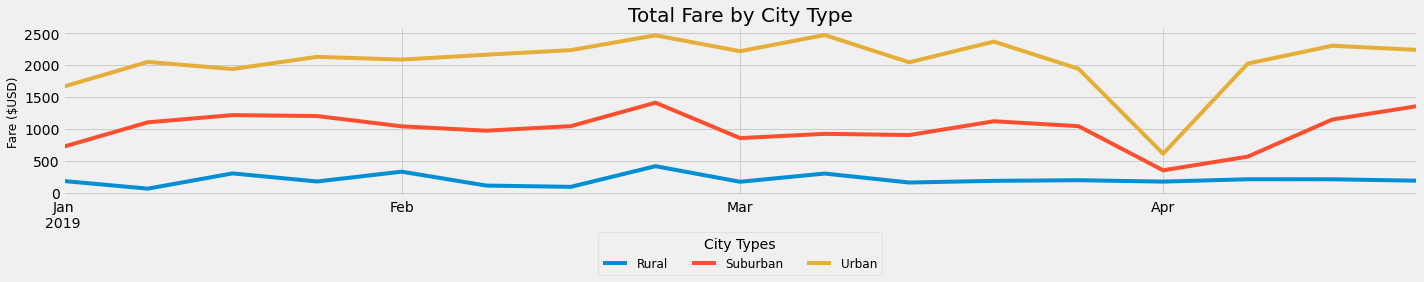

In [62]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig = plt.figure()
ax = weeks_df.plot(figsize = (20,5))

plt.title("Total Fare by City Type", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=12)
plt.xlabel("")

lgnd = ax.legend(fontsize="12", mode="Expanded", title="City Types", ncol=3, loc='lower center',
                 bbox_to_anchor=(0.5, -0.5))
lgnd.get_title().set_fontsize(14)


plt.tight_layout()
plt.savefig("Analysis/PyBer_fare_summary.png")